# Amazon Product Reviews Analysis based on NLP

# Zhilin Yang, MS in AMS (STAT), SBU ID: 114153069

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

Load Data

In [19]:
df = pd.read_csv("Reviews.csv")
print(df.head())
print(df.shape)
print(df.columns)

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

Check missing values

In [20]:
print(df.isna().sum())

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64


In [21]:
df = df.drop(['ProfileName'], axis=1)
df = df.dropna()
df = df.reset_index(drop=True)

Plot Scores Distrubution

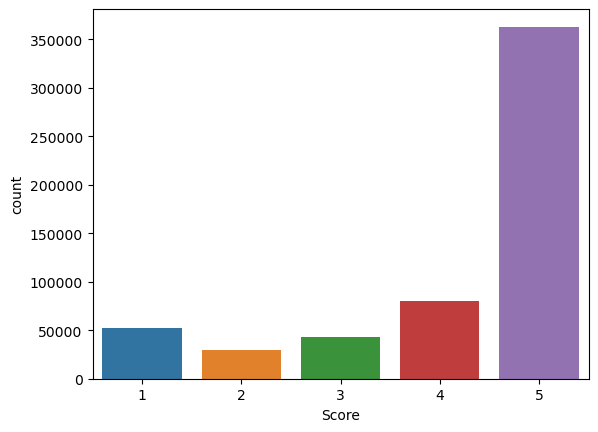

In [22]:
sns.countplot(data = df, x = "Score")
plt.show()

Text Cleaning

In [23]:
abbreviations = {
                        "$" : " dollar ",                      
                        "€" : " euro ",
                        "4ao" : "for adults only",
                        "a.m" : "before midday",
                        "a3" : "anytime anywhere anyplace",
                        "aamof" : "as a matter of fact",
                        "acct" : "account",
                        "adih" : "another day in hell",
                        "afaic" : "as far as i am concerned",
                        "afaict" : "as far as i can tell",
                        "afaik" : "as far as i know",
                        "afair" : "as far as i remember",
                        "afk" : "away from keyboard",
                        "app" : "application",
                        "approx" : "approximately",
                        "apps" : "applications",
                        "asap" : "as soon as possible",
                        "asl" : "age, sex, location",
                        "atk" : "at the keyboard",
                        "ave." : "avenue",
                        "aymm" : "are you my mother",
                        "ayor" : "at your own risk", 
                        "b&b" : "bed and breakfast",
                        "b+b" : "bed and breakfast",
                        "b.c" : "before christ",
                        "b2b" : "business to business",
                        "b2c" : "business to customer",
                        "b4" : "before",
                        "b4n" : "bye for now",
                        "b@u" : "back at you",
                        "bae" : "before anyone else",
                        "bak" : "back at keyboard",
                        "bbbg" : "bye bye be good",
                        "bbc" : "british broadcasting corporation",
                        "bbias" : "be back in a second",
                        "bbl" : "be back later",
                        "bbs" : "be back soon",
                        "be4" : "before",
                        "bfn" : "bye for now",
                        "blvd" : "boulevard",
                        "bout" : "about",
                        "brb" : "be right back",
                        "bros" : "brothers",
                        "brt" : "be right there",
                        "bsaaw" : "big smile and a wink",
                        "btw" : "by the way",
                        "bwl" : "bursting with laughter",
                        "c/o" : "care of",
                        "cet" : "central european time",
                        "cf" : "compare",
                        "cia" : "central intelligence agency",
                        "csl" : "can not stop laughing",
                        "cu" : "see you",
                        "cul8r" : "see you later",
                        "cv" : "curriculum vitae",
                        "cwot" : "complete waste of time",
                        "cya" : "see you",
                        "cyt" : "see you tomorrow",
                        "dae" : "does anyone else",
                        "dbmib" : "do not bother me i am busy",
                        "diy" : "do it yourself",
                        "dm" : "direct message",
                        "dwh" : "during work hours",
                        "e123" : "easy as one two three",
                        "eet" : "eastern european time",
                        "eg" : "example",
                        "embm" : "early morning business meeting",
                        "encl" : "enclosed",
                        "encl." : "enclosed",
                        "etc" : "and so on",
                        "faq" : "frequently asked questions",
                        "fawc" : "for anyone who cares",
                        "fb" : "facebook",
                        "fc" : "fingers crossed",
                        "fig" : "figure",
                        "fimh" : "forever in my heart", 
                        "ft." : "feet",
                        "ft" : "featuring",
                        "ftl" : "for the loss",
                        "ftw" : "for the win",
                        "fwiw" : "for what it is worth",
                        "fyi" : "for your information",
                        "g9" : "genius",
                        "gahoy" : "get a hold of yourself",
                        "gal" : "get a life",
                        "gcse" : "general certificate of secondary education",
                        "gfn" : "gone for now",
                        "gg" : "good game",
                        "gl" : "good luck",
                        "glhf" : "good luck have fun",
                        "gmt" : "greenwich mean time",
                        "gmta" : "great minds think alike",
                        "gn" : "good night",
                        "g.o.a.t" : "greatest of all time",
                        "goat" : "greatest of all time",
                        "goi" : "get over it",
                        "gps" : "global positioning system",
                        "gr8" : "great",
                        "gratz" : "congratulations",
                        "gyal" : "girl",
                        "h&c" : "hot and cold",
                        "hp" : "horsepower",
                        "hr" : "hour",
                        "hrh" : "his royal highness",
                        "ht" : "height",
                        "ibrb" : "i will be right back",
                        "ic" : "i see",
                        "icq" : "i seek you",
                        "icymi" : "in case you missed it",
                        "idc" : "i do not care",
                        "idgadf" : "i do not give a damn fuck",
                        "idgaf" : "i do not give a fuck",
                        "idk" : "i do not know",
                        "ie" : "that is",
                        "i.e" : "that is",
                        "ifyp" : "i feel your pain",
                        "IG" : "instagram",
                        "iirc" : "if i remember correctly",
                        "ilu" : "i love you",
                        "ily" : "i love you",
                        "imho" : "in my humble opinion",
                        "imo" : "in my opinion",
                        "imu" : "i miss you",
                        "iow" : "in other words",
                        "irl" : "in real life",
                        "j4f" : "just for fun",
                        "jic" : "just in case",
                        "jk" : "just kidding",
                        "jsyk" : "just so you know",
                        "l8r" : "later",
                        "lb" : "pound",
                        "lbs" : "pounds",
                        "ldr" : "long distance relationship",
                        "lmao" : "laugh my ass off",
                        "lmfao" : "laugh my fucking ass off",
                        "lol" : "laughing out loud",
                        "ltd" : "limited",
                        "ltns" : "long time no see",
                        "m8" : "mate",
                        "mf" : "motherfucker",
                        "mfs" : "motherfuckers",
                        "mfw" : "my face when",
                        "mofo" : "motherfucker",
                        "mph" : "miles per hour",
                        "mr" : "mister",
                        "mrw" : "my reaction when",
                        "ms" : "miss",
                        "mte" : "my thoughts exactly",
                        "nagi" : "not a good idea",
                        "nbc" : "national broadcasting company",
                        "nbd" : "not big deal",
                        "nfs" : "not for sale",
                        "ngl" : "not going to lie",
                        "nhs" : "national health service",
                        "nrn" : "no reply necessary",
                        "nsfl" : "not safe for life",
                        "nsfw" : "not safe for work",
                        "nth" : "nice to have",
                        "nvr" : "never",
                        "nyc" : "new york city",
                        "oc" : "original content",
                        "og" : "original",
                        "ohp" : "overhead projector",
                        "oic" : "oh i see",
                        "omdb" : "over my dead body",
                        "omg" : "oh my god",
                        "omw" : "on my way",
                        "p.a" : "per annum",
                        "p.m" : "after midday",
                        "pm" : "prime minister",
                        "poc" : "people of color",
                        "pov" : "point of view",
                        "pp" : "pages",
                        "ppl" : "people",
                        "prw" : "parents are watching",
                        "ps" : "postscript",
                        "pt" : "point",
                        "ptb" : "please text back",
                        "pto" : "please turn over",
                        "qpsa" : "what happens", #"que pasa",
                        "ratchet" : "rude",
                        "rbtl" : "read between the lines",
                        "rlrt" : "real life retweet", 
                        "rofl" : "rolling on the floor laughing",
                        "roflol" : "rolling on the floor laughing out loud",
                        "rotflmao" : "rolling on the floor laughing my ass off",
                        "rt" : "retweet",
                        "ruok" : "are you ok",
                        "sfw" : "safe for work",
                        "sk8" : "skate",
                        "smh" : "shake my head",
                        "sq" : "square",
                        "srsly" : "seriously", 
                        "ssdd" : "same stuff different day",
                        "tbh" : "to be honest",
                        "tbs" : "tablespooful",
                        "tbsp" : "tablespooful",
                        "tfw" : "that feeling when",
                        "thks" : "thank you",
                        "tho" : "though",
                        "thx" : "thank you",
                        "tia" : "thanks in advance",
                        "til" : "today i learned",
                        "tl;dr" : "too long i did not read",
                        "tldr" : "too long i did not read",
                        "tmb" : "tweet me back",
                        "tntl" : "trying not to laugh",
                        "ttyl" : "talk to you later",
                        "u" : "you",
                        "u2" : "you too",
                        "u4e" : "yours for ever",
                        "utc" : "coordinated universal time",
                        "w/" : "with",
                        "w/o" : "without",
                        "w8" : "wait",
                        "wassup" : "what is up",
                        "wb" : "welcome back",
                        "wtf" : "what the fuck",
                        "wtg" : "way to go",
                        "wtpa" : "where the party at",
                        "wuf" : "where are you from",
                        "wuzup" : "what is up",
                        "wywh" : "wish you were here",
                        "yd" : "yard",
                        "ygtr" : "you got that right",
                        "ynk" : "you never know",
                        "zzz" : "sleeping bored and tired"
}
def expand_abbreviations(text):
    for abbreviation, full_form in abbreviations.items():
        text = re.sub(r'\b' + abbreviation + r'\b', full_form, text)
    return text

In [24]:
%time
import re
import unicodedata
import contractions
import string
def clean_text(text):
    text = contractions.fix(text) # Expand contractions
    text = expand_abbreviations(text) # Replace abbreviations
    text = re.sub('<.*?>', '', text)  # remove HTML tags
    text = re.sub(r'http\S+', '', text)  # remove URLs
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore') # Remove non-ASCII characters
    text = re.sub(r'[^\w\s]', '', text) # Remove special characters
    text = text.translate(str.maketrans('', '', string.punctuation)) # Remove punctuation
    return text

df['Text'] = df['Text'].apply(clean_text)

In [25]:
%time
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def tokenize(text):
    text = re.sub('[^a-zA-Z]', ' ', text)  # remove non-alphabetic characters
    text = text.lower()  # convert to lowercase
    words = text.split()  # split into words
    words = [stemmer.stem(word) for word in words if word not in stop_words]  # remove stop words and stem
    return words

df['words'] = df['Text'].apply(tokenize)

CPU times: total: 0 ns
Wall time: 998 µs


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Zhilin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
df.head()

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,words
0,1,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,"[bought, sever, vital, can, dog, food, product..."
1,2,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,"[product, arriv, label, jumbo, salt, peanutsth..."
2,3,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,"[confect, around, centuri, light, pillowi, cit..."
3,4,B000UA0QIQ,A395BORC6FGVXV,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,"[look, secret, ingredi, robitussin, believ, fo..."
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,1350777600,Great taffy,Great taffy at a great price There was a wide...,"[great, taffi, great, price, wide, assort, yum..."


Frequent words after tonkenization

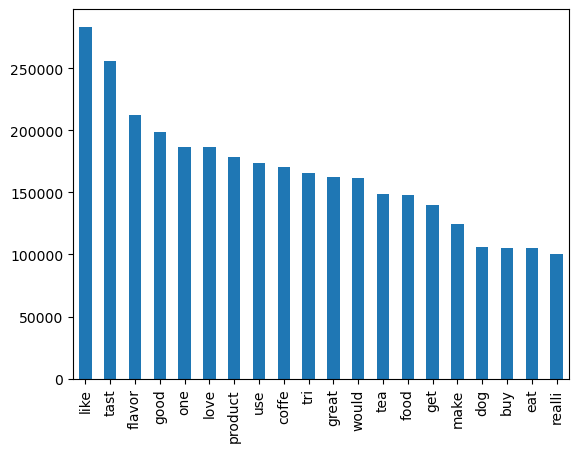

In [27]:
word_freq = pd.Series(np.concatenate(df['words'])).value_counts()
word_freq[:20].plot(kind='bar')
plt.show()

Word Cloud after tokenizaion

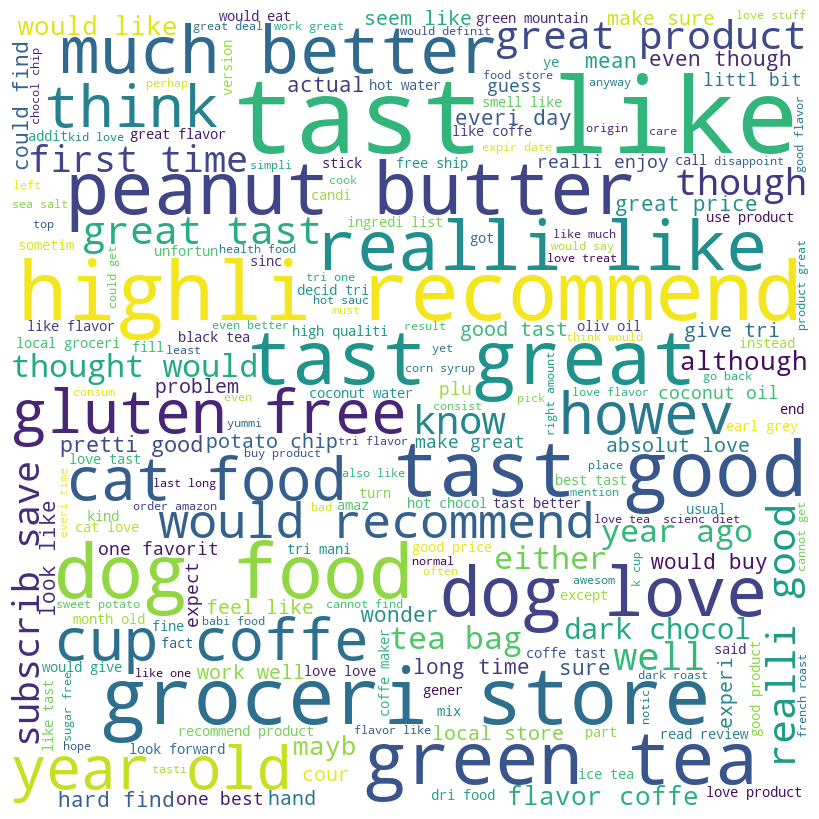

In [30]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(' '.join(np.concatenate(df['words'])))

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

Logistic Regresssion

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Score'], test_size=0.2, random_state=123)

# Convert the text data into bag-of-words features
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# Train a logistic regression model on the training set
lr = LogisticRegression()
lr.fit(X_train_bow, y_train)

# Evaluate the model on the test set
y_pred = lr.predict(X_test_bow)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion matrix:\n{cm}")
print(f"Classification report:\n{cr}")

E:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7297644388930915
Confusion matrix:
[[ 6513   608   443   206  2599]
 [ 1514  1140   918   358  1970]
 [  818   639  2501  1167  3517]
 [  341   274  1120  3586 10777]
 [  758   191   656  1848 69224]]
Classification report:
              precision    recall  f1-score   support

           1       0.65      0.63      0.64     10369
           2       0.40      0.19      0.26      5900
           3       0.44      0.29      0.35      8642
           4       0.50      0.22      0.31     16098
           5       0.79      0.95      0.86     72677

    accuracy                           0.73    113686
   macro avg       0.56      0.46      0.48    113686
weighted avg       0.69      0.73      0.69    113686



In [32]:
# Scale the features using StandardScaler
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train_bow)
X_test_scaled = scaler.transform(X_test_bow)

# Train a logistic regression model on the training set
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
y_pred = lr.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion matrix:\n{cm}")
print(f"Classification report:\n{cr}")

E:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7431609872807557
Confusion matrix:
[[ 6769  1004   654   404  1538]
 [  895  2887   664   459   995]
 [  670   695  4284  1045  1948]
 [  494   569  1125  7204  6706]
 [ 1428  1094  1892  4920 63343]]
Classification report:
              precision    recall  f1-score   support

           1       0.66      0.65      0.66     10369
           2       0.46      0.49      0.48      5900
           3       0.50      0.50      0.50      8642
           4       0.51      0.45      0.48     16098
           5       0.85      0.87      0.86     72677

    accuracy                           0.74    113686
   macro avg       0.60      0.59      0.59    113686
weighted avg       0.74      0.74      0.74    113686



Support vector machines

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a SVM model on the training set
svm = LinearSVC()
svm.fit(X_train_tfidf, y_train)

# Evaluate the model on the test set
y_pred = svm.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification report:\n{cr}")
%time

Accuracy: 0.7829987861302183
Classification report:
              precision    recall  f1-score   support

           1       0.72      0.74      0.73     10369
           2       0.65      0.35      0.46      5900
           3       0.62      0.42      0.50      8642
           4       0.61      0.37      0.46     16098
           5       0.83      0.96      0.89     72677

    accuracy                           0.78    113686
   macro avg       0.69      0.57      0.61    113686
weighted avg       0.76      0.78      0.76    113686

CPU times: total: 0 ns
Wall time: 0 ns


Naive Bayes

In [40]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_bow, y_train)

# Evaluate the model on the test set
y_pred = nb.predict(X_test_bow)
accuracy = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification report:\n{cr}")

Accuracy: 0.7244339672431082
Classification report:
              precision    recall  f1-score   support

           1       0.62      0.62      0.62     10369
           2       0.65      0.13      0.21      5900
           3       0.50      0.25      0.33      8642
           4       0.43      0.37      0.40     16098
           5       0.80      0.92      0.86     72677

    accuracy                           0.72    113686
   macro avg       0.60      0.46      0.48    113686
weighted avg       0.70      0.72      0.70    113686



Long short-term memory networks

In [52]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Convert the text data into sequences of tokens
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to ensure equal length
maxlen = 100
X_train_pad = pad_sequences(X_train_seq, padding='post', maxlen=maxlen)
X_test_pad = pad_sequences(X_test_seq, padding='post', maxlen=maxlen)

# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=64, input_length=maxlen))
model.add(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training set
history = model.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
_, accuracy = model.evaluate(X_test_pad, y_test)

print(f"Accuracy: {accuracy}")

Epoch 1/10
11369/11369 [==============================] - 482s 42ms/step - loss: -1208.5480 - accuracy: 0.0926 - val_loss: -2389.2217 - val_accuracy: 0.0905
Epoch 2/10
11369/11369 [==============================] - 491s 43ms/step - loss: -3552.9866 - accuracy: 0.0926 - val_loss: -4740.1357 - val_accuracy: 0.0905
Epoch 3/10
11369/11369 [==============================] - 491s 43ms/step - loss: -5897.4521 - accuracy: 0.0926 - val_loss: -7091.7896 - val_accuracy: 0.0905
Epoch 4/10
11369/11369 [==============================] - 500s 44ms/step - loss: -8242.6836 - accuracy: 0.0926 - val_loss: -9443.5107 - val_accuracy: 0.0905
Epoch 5/10
11369/11369 [==============================] - 495s 44ms/step - loss: -10586.8887 - accuracy: 0.0926 - val_loss: -11794.8936 - val_accuracy: 0.0905
Epoch 6/10
11369/11369 [==============================] - 500s 44ms/step - loss: -12931.1006 - accuracy: 0.0926 - val_loss: -14146.1357 - val_accuracy: 0.0905
Epoch 7/10
11369/11369 [==============================